# 数字の出現数を数える
## プログラムの概要
あるシステムが生成する認証コードは6桁の整数です。このコードに現れる各桁の数字(Digit)の分布がどの程度一様なのかを調べます。
実際に生成されたコードの一覧から、各桁の数字に分解して頻度を数えます。
まずは生成されたcodeの一覧を変数`codes`に割り当てます。

In [1]:
#!python3
#-*- coding:utf-8 -*-
# '#'以降は行末までがコメントになります。（プログラムとしては実行されない）
nlen=6 # コードの桁数は6桁
codes=(
    227524,    463251,    702567,    601620,
    129458,    413239,    629380,    526093,
    261547,    666552,    853626,    513298,
    142167,    612906,    995697,    660500,
    954404,    651454,    566439,    730975,
    578967,    603424,    435636,    891667,
    757294,    325567,    131075,    757309, 
    198547
    # 012345 のように0から始まるcodeは, 0を省いて書くことにします。
)

次に一つの code の各桁に現れる数字の出現回数を数えます。
一番下の桁から順番にみていきます。

In [2]:
def count_digits(code,nlen=6): #　関数　`count_digits`を定義します。
    # 最大二つの引数を持ちますが、二つ目の引数`nlen`は省略可能で、
    # 省略された場合の値(既定値)は6です。
    acc={} #これに数字毎の出現回数を入れていきます。
    code=code+10**nlen # 最上位が0の場合を取り扱うために、10**nlenを足しておく。
    # code =227524 であれば　code=1227524とするということ。
    while code>=10:
        code, d=divmod(code, 10) #商 `code` と余り `d` に分解します。
        # code=1227524　=> code=122752,d=4
        acc[d]=acc.get(d,0)+1 
        # accのkeyにdがあればその値に1を足したもの、さもなければ 0+1をacc[d]に設定する。
    return acc

一覧表`codes`の全ての`code`に現れる数字に頻度を数えて、足していきます。
結果の度数分布表`acc`を関数の値として返します。

In [3]:
def count_digits_in_list(codes,nlen):
    acc={}
    for code in codes: #codesの中に入っている全てのcodeについて
        count=count_digits(code,nlen) #コードの中の数字の出現表を作る。
        for d in count: #codeでの数字の出現数をaccに足して行く。
            acc[d]=acc.get(d,0)+count[d]
    return acc

`codes`の中の数字の度数分表を印刷し、ヒストグラムを表示させてみます。

In [16]:
import matplotlib.pyplot as pyplot #グラフ作成の準備のおまじない
import numpy

def main():
    counts=count_digits_in_list(codes,nlen) #codeの一覧codesから数字の出現数の表を作成する。
    print("digit:  count")# 印刷する表のラベルを印刷する。
    for d in sorted(counts): # 出現表にあらわれる数字を整列させた順番に、
        print (d,":",counts[d]) # 数字(d)とその出現数(count[d])を印刷する。
    # print("average:",len(codes)*nlen/10) #数字の出現数の平均値を印刷する。
    print("average:", sum(counts.values())/len(counts)) # 6*len(codes)/10
    print("std. dev:{:4.1f}".format(numpy.std(list(counts.values()))))
    pyplot.bar(counts.keys(),counts.values()) # barグラフを印刷する。
    pyplot.draw() #グラフ作成のおまじない
    #pyplot.show() #グラフ作成の最後のおまじない. Jupyter Notebookでは不要


digit:  count
0 : 14
1 : 14
2 : 19
3 : 15
4 : 17
5 : 25
6 : 28
7 : 18
8 : 7
9 : 17
average: 17.4
std. dev: 5.6


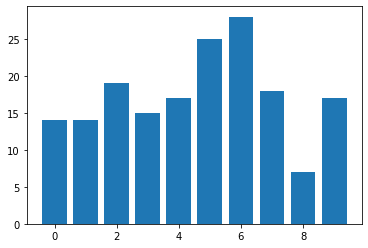

In [17]:
if __name__ == "__main__":
    main()

## pandas/DataFrame
Data Analysis分野で最近よく使われるDataFrameオブジェクトを使うと、
短いプログラムでデータのリストから度数分表を取出し、またヒストグラムを表示させることができる。

In [6]:
import pandas

def split_digits(code,nlen=6):
    acc=[] # あらわれた数字を順番に保存する。
    code=code+10**nlen # 最上位が0の場合を取り扱うため
    while code>=10:
        code,d=divmod(code,10)
        acc.insert(0,d)
    return acc

def split_codes():
    acc=[]
    for code in codes:
        acc +=split_digits(code)
    return acc

0    14
1    14
2    19
3    15
4    17
5    25
6    28
7    18
8     7
9    17
dtype: int64


<AxesSubplot:xlabel='0'>

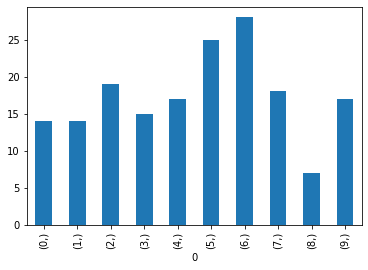

In [7]:
df=pandas.DataFrame(split_codes()).value_counts(sort=False)
print(df)
df.plot.bar()

## matplotlib.pyplot

matplotlib.pyplotを使って、ヒストグラムの表示と度数分布を求めることも可能です。

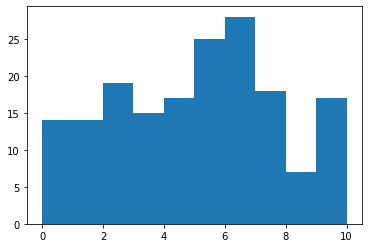

In [8]:
counts, digits, chart = pyplot.hist(
    split_codes(), 
    bins=range(0,11)
)

In [9]:
for p in (zip(digits,counts)): print(p)

(0, 14.0)
(1, 14.0)
(2, 19.0)
(3, 15.0)
(4, 17.0)
(5, 25.0)
(6, 28.0)
(7, 18.0)
(8, 7.0)
(9, 17.0)
